In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogLocator, ScalarFormatter

Plote do distribuition  make for the reply

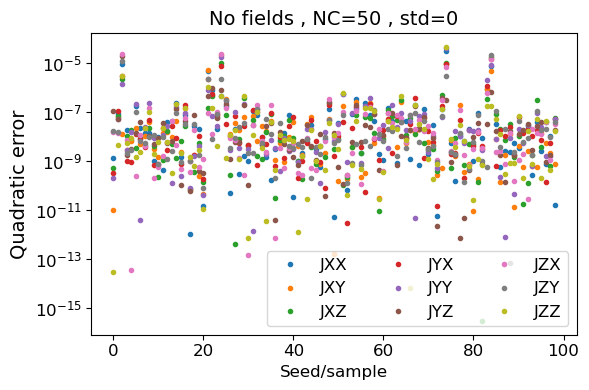

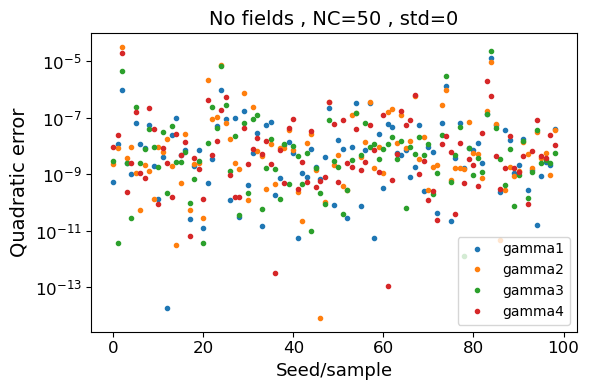

In [7]:
# Parâmetros do range de N_c
Nc_values       = [50]  # Apenas N=50
parametros_gamma= ['gamma1', 'gamma2', 'gamma3', 'gamma4']
parametros_J    = ['JXX', 'JXY', 'JXZ', 'JYX', 'JYY', 'JYZ', 'JZX', 'JZY', 'JZZ']

for N in Nc_values:
    # Armazenar todos os pontos individuais
    all_gamma_points = {g: [] for g in parametros_gamma}
    all_js_points    = {j: [] for j in parametros_J}

    for N in Nc_values:
        for i in range(1, 100):
            caminho         = f'/home/gubio/CODESPACE/Pinn-inverse-for-opem-quantum-system/No fields/raw_data/parametro_nofields_N{N}_seed{i}_std0.csv'
            df              = pd.read_csv(caminho, index_col=0)
            valor_real      = df['treino'].str.strip('[]').astype(float)
            valor_previsto  = df['previsto'].str.strip('[]').astype(float)
            erro_abs        = np.abs(valor_real - valor_previsto)**2

            for g in parametros_gamma:
                all_gamma_points[g].append(erro_abs[g])
            for j in parametros_J:
                all_js_points[j].append(erro_abs[j])

    # Gráfico 1: todos os J
    plt.figure(figsize=(6, 4))
    for j, color in zip(parametros_J, plt.cm.tab10(range(len(parametros_J)))):
        plt.plot(all_js_points[j], '.', label=j, color=color)
    plt.title(f'No fields , NC={N} , std=0', fontsize=14)
    plt.yscale('log')
    plt.xlabel('Seed/sample', fontsize=12)
    plt.ylabel('Quadratic error', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(fontsize=12, loc='lower right', ncol=3)
    plt.tight_layout()
    plt.show()

    # Gráfico 2: todos os gammas
    plt.figure(figsize=(6, 4))
    for g, color in zip(parametros_gamma, plt.cm.tab10(range(len(parametros_gamma)))):
        plt.plot(all_gamma_points[g], '.', label=g, color=color)
    plt.title(f'No fields , NC={N} , std=0', fontsize=14)
    plt.yscale('log')
    plt.xlabel('Seed/sample', fontsize=13)
    plt.ylabel('Quadratic error', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

individual plote

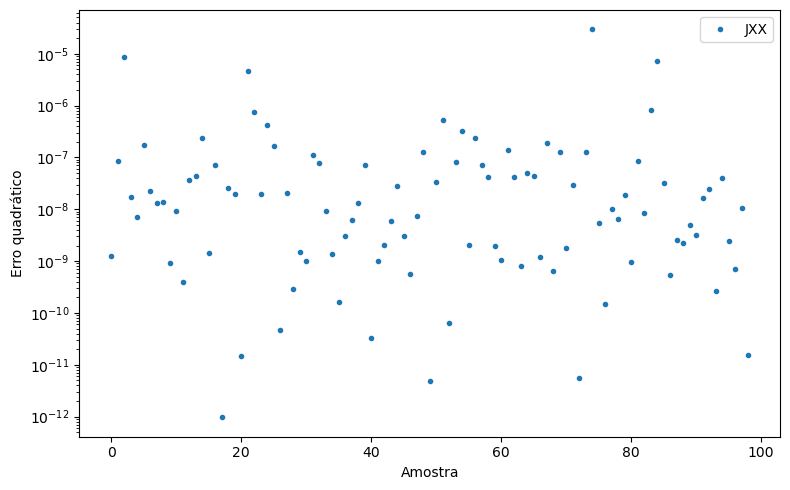

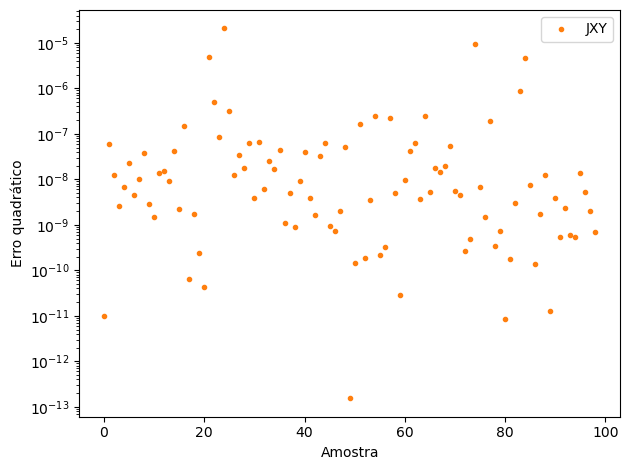

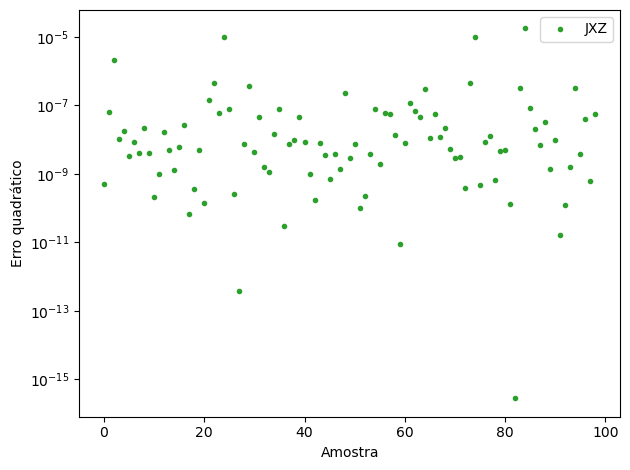

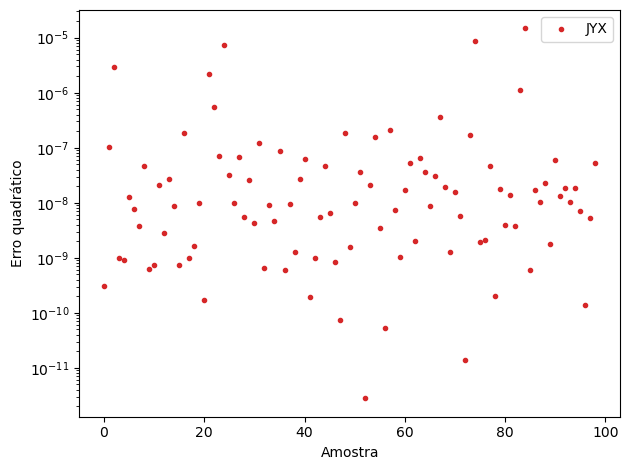

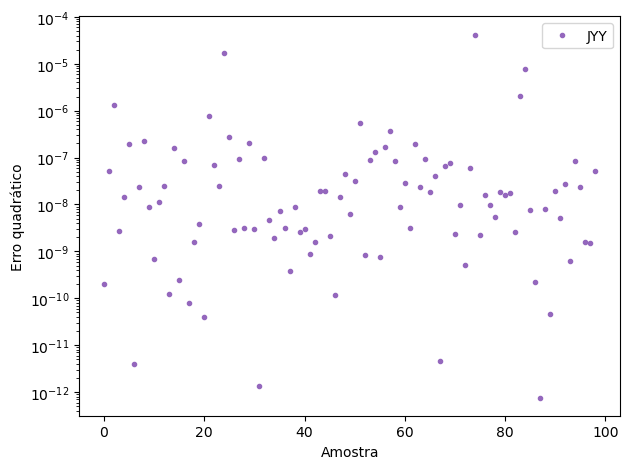

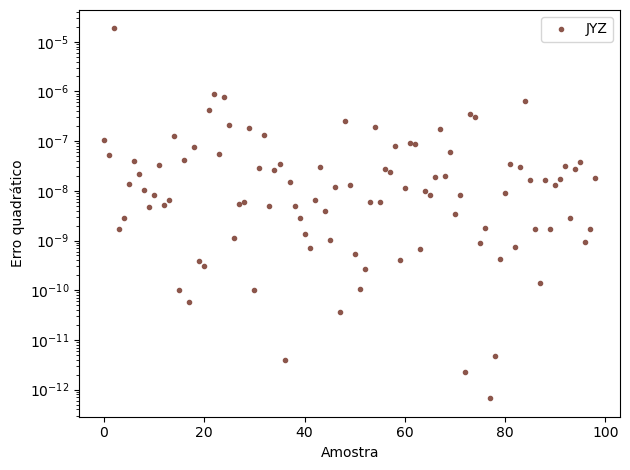

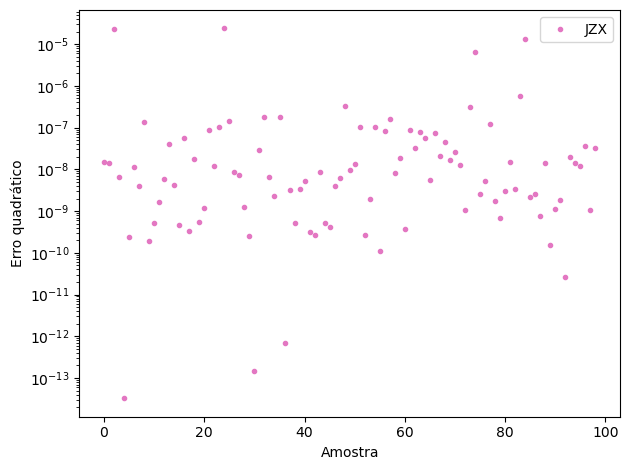

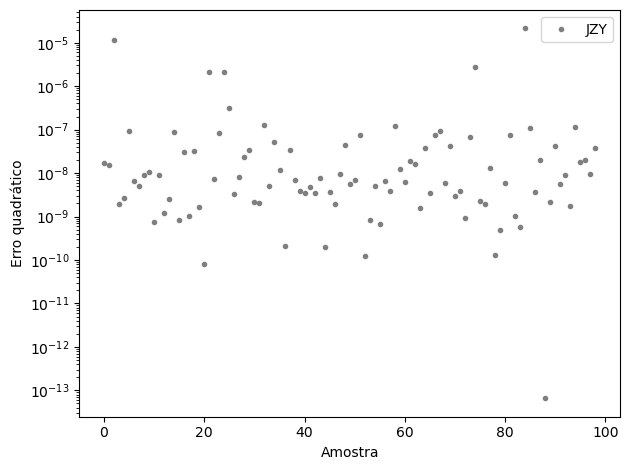

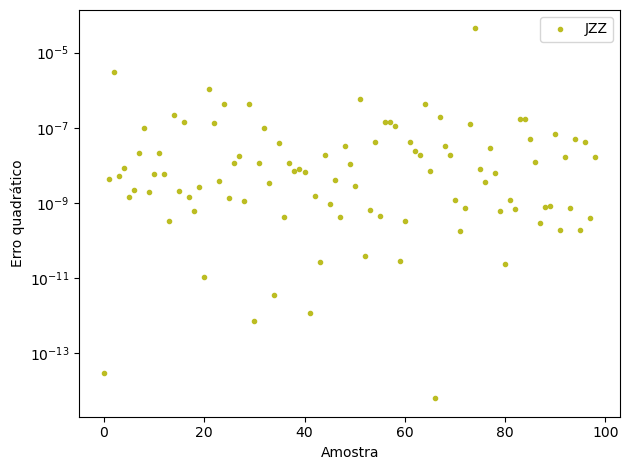

In [5]:
# Parâmetros do range de N_c
Nc_values       = [50]  # Apenas N=50
parametros_gamma= ['gamma1', 'gamma2', 'gamma3', 'gamma4']
parametros_J    = ['JXX', 'JXY', 'JXZ', 'JYX', 'JYY', 'JYZ', 'JZX', 'JZY', 'JZZ']

# Armazenar todos os pontos individuais
all_gamma_points = {g: [] for g in parametros_gamma}
all_js_points    = {j: [] for j in parametros_J}

for N in Nc_values:
    for i in range(1, 100):
        caminho         = f'/home/gubio/CODESPACE/Pinn-inverse-for-opem-quantum-system/No fields/raw_data/parametro_nofields_N50_seed{i}_std0.csv'
        df              = pd.read_csv(caminho, index_col=0)
        valor_real      = df['treino'].str.strip('[]').astype(float)
        valor_previsto  = df['previsto'].str.strip('[]').astype(float)
        erro_abs        = np.abs(valor_real - valor_previsto)**2

        for g in parametros_gamma:
            all_gamma_points[g].append(erro_abs[g])
        for j in parametros_J:
            all_js_points[j].append(erro_abs[j])

# Gráfico 1: todos os J
plt.figure(figsize=(8, 5))
for j, color in zip(parametros_J, plt.cm.tab10(range(len(parametros_J)))):
    plt.plot(all_js_points[j], '.', label=j, color=color)
    #plt.title(f'Erros por parâmetro J{j}')
    plt.yscale('log')
    plt.xlabel('Amostra')
    plt.ylabel('Erro quadrático')
    plt.legend()
    plt.tight_layout()
    plt.show()